In [11]:
# Step 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
# Step 2: Create synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, 
                           n_informative=5, n_redundant=2, 
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Step 3: Poor Training (simulate underfitting)
# - Train with very few samples
X_train_poor, _, y_train_poor, _ = train_test_split(X_train, y_train, train_size=0.05, random_state=42)

In [14]:
poor_model = LogisticRegression(max_iter=50)  # low iterations
poor_model.fit(X_train_poor, y_train_poor)

y_pred_poor = poor_model.predict(X_test)

/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [16]:
# Step 4: Rich Training (proper training)
rich_model = LogisticRegression(max_iter=1000)  # enough iterations
rich_model.fit(X_train, y_train)

y_pred_rich = rich_model.predict(X_test)

/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/amandeepsinghreen/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in 

In [17]:
print("=== Poor Training Output ===")
print("Accuracy:", accuracy_score(y_test, y_pred_poor))
print(classification_report(y_test, y_pred_poor))

=== Poor Training Output ===
Accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       153
           1       0.78      0.63      0.70       147

    accuracy                           0.73       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300



In [18]:
print("\n=== Rich Training Output ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rich))
print(classification_report(y_test, y_pred_rich))


=== Rich Training Output ===
Accuracy: 0.8066666666666666
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       153
           1       0.82      0.78      0.80       147

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



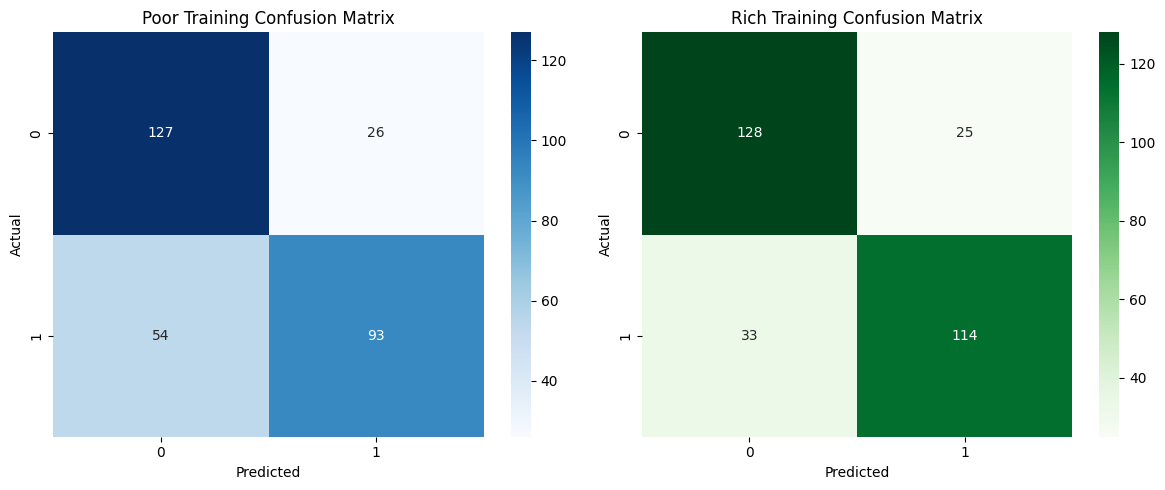

In [19]:
import seaborn as sns


# 5. Visualize confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_poor = confusion_matrix(y_test, y_pred_poor)
sns.heatmap(cm_poor, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Poor Training Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

cm_rich = confusion_matrix(y_test, y_pred_rich)
sns.heatmap(cm_rich, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Rich Training Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()